In [21]:
import sys
import os


import pandas as pd
import matplotlib.pyplot as plt


# Prevent scientific notation in pandas output.
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Add the parent directory to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


from database import Database
from model.ticker import Ticker


DB_PATH = "sqlite:///../finance.db"


db = Database(database_url=DB_PATH)

# Let's Do Some High Level Queries On The Table

In [4]:
unique_tickers = db.session.query(Ticker.symbol).distinct().count()

In [5]:
unique_tickers

4000

# Load A Sample Of Data Into Pandas

We want to load a sample since the database has roughly 25 million rows. Sampling makes the demo easier to present without crashing the browser.

In [8]:
year = 2010
query = f"SELECT * FROM ticker WHERE strftime('%Y', ticker.date) = '{year}'"

In [40]:
df = pd.read_sql(query, db.engine)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [41]:
df.describe()

id                           date        open        high  \
count  1044000.000                        1044000 1044000.000 1044000.000   
mean  12521609.500  2010-07-02 19:07:35.172413440     249.979     263.009   
min       2610.000            2010-01-01 00:00:00       0.985       1.079   
25%    6262109.750            2010-04-02 00:00:00      86.348      90.865   
50%   12521609.500            2010-07-02 00:00:00     181.516     191.091   
75%   18781109.250            2010-10-01 00:00:00     336.361     353.789   
max   25040609.000            2010-12-31 00:00:00    2520.380    2631.542   
std    7229583.308                            NaN     237.887     250.233   

              low       close      volume  
count 1044000.000 1044000.000 1044000.000  
mean      235.933     249.988 1075619.915  
min         0.936       1.034   49077.000  
25%        81.526      86.464  564369.000  
50%       171.390     181.713 1087653.000  
75%       317.443     336.434 1581562.500  
max      2335.396    2461.570 2299658.000  
std       224.430     237.659  591062.757

In [51]:
hpar = df[df['symbol'] == 'HPAR-fake']
vhex = df[df['symbol'] == 'RVBL-fake']

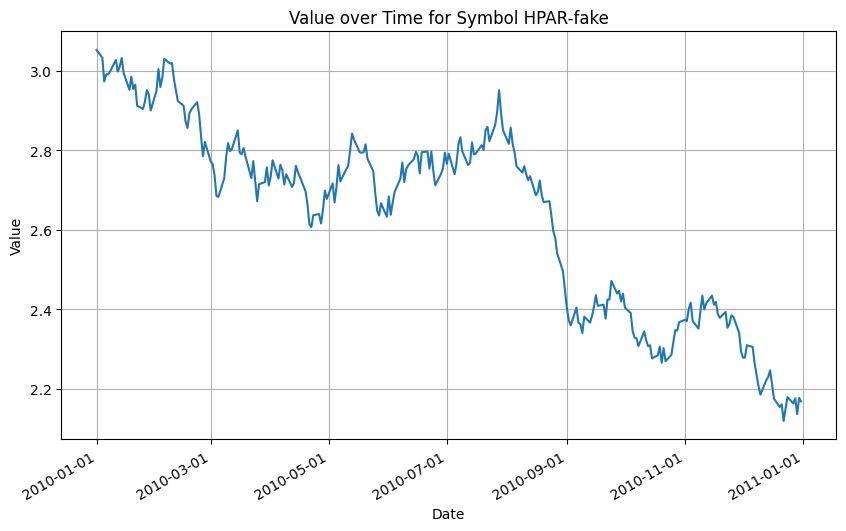

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(vhex['date'], vhex['close'], linestyle='-')
plt.title('Value over Time for Symbol HPAR-fake')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Formatting the date
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()


plt.show()